In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


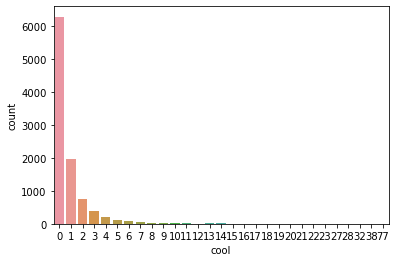

In [5]:
sb.countplot(data=df, x='cool')
plt.show()

In [ ]:
# 새로운 text컬럼 길이 구해서 length 컬럼 만들기

In [9]:
df.text.str.len() 
#또는 
df['length'] = df.text.apply(len)

In [ ]:
# 리뷰 length를 히스토그램으로 나타내기

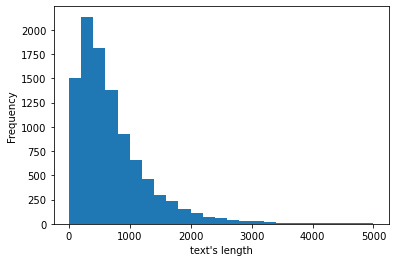

In [10]:
df.length.plot(kind='hist', bins=25)
plt.xlabel('text\'s length')
plt.show()

In [ ]:
# 별점 별로 리뷰 몇개씩 있는지 차트 그리기

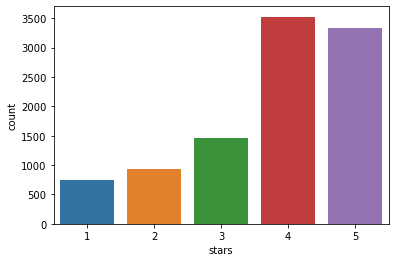

In [14]:
sb.countplot(data=df, x='stars')
plt.show()

In [ ]:
# 위의 처럼만 하면 정렬이 안됨
# 정렬은 order= 파라미터를 지정
# stars 컬럼을 value_counts()를 하면
# 카운트가 정렬되는데 이때의 인덱스를 활용하면 좋다
# 변수에 저장하거나, .index속성을 사용

In [18]:
stars_vc_index = df.stars.value_counts().index

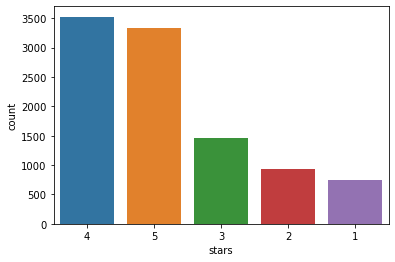

In [19]:
sb.countplot(data=df, x='stars', order=stars_vc_index)
plt.show()

In [ ]:
# 별점 1점과 5점 짜리만 데이터 프레임으로 만들기
# 일단 2,3,4점은 애매해서 학습하기 어렵다
# 1점은 부정, 5점은 긍정의 의미로 학습

In [21]:
df.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889


In [24]:
# star 1
df1 = df.loc[ df.stars == 1 , ]

In [26]:
df1 = df1.iloc[:, [3,4,7,8,9, 10] ]

In [27]:
# stars 5
df5 = df.loc[ df.stars == 5 , ]

In [28]:
df5 = df5.iloc[:, [3,4,7,8,9, 10] ]

concat() 두개df를 위아래로 합침 (컬럼이 같은 경우)

In [ ]:
# 데이터프레임 합치기

In [31]:
df_1_5 = pd.concat( [df1, df5] )

In [32]:
df_1_5

,stars,text,cool,useful,funny,length
23,1,U can go there n check the car out. If u wanna...,0,1,1,594
31,1,Disgusting! Had a Groupon so my daughter and ...,0,1,0,361
35,1,"I've eaten here many times, but none as bad as...",0,4,3,1198
61,1,I have always been a fan of Burlington's deals...,0,0,0,569
64,1,Another night meeting friends here. I have to...,0,1,2,498
...,...,...,...,...,...,...
9990,5,Yes I do rock the hipster joints. I dig this ...,1,1,1,263
9991,5,Only 4 stars? \n\n(A few notes: The folks that...,1,1,0,908
9992,5,I'm not normally one to jump at reviewing a ch...,2,3,2,1326
9994,5,Let's see...what is there NOT to like about Su...,1,2,1,1968


In [ ]:
# 별점 시각화하기

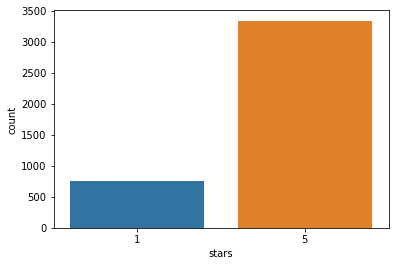

In [33]:
sb.countplot(data=df_1_5, x='stars')
plt.show()

In [ ]:
# 별점 비율 퍼센트 화기
# pie차트 그리기
# 먼저 시리즈 데이터로 만들어 줘야한다 
# 변수에 만들거나 데이터프레임.컬럼.value_counts() 로 plt.pie()에서 입력

In [36]:
pie_chart = df_1_5.stars.value_counts()

In [37]:
pie_chart.shape

(2,)

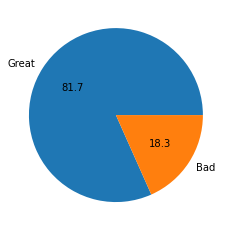

In [39]:
plt.pie(pie_chart, autopct='%.1f', labels=['Great', 'Bad'])
plt.show()

In [ ]:
# 구두점 제거, 불용어 가능 사용자 함수 만들기
# 위의 관련된 라이브러리 import

In [40]:
import string

In [42]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
import nltk

In [45]:
# nltk의 불용어 다운로드
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sgtocta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords

In [47]:
# 불용어 사전
stopList = stopwords.words('english')

사용자 함수 msg_cleaning()

In [52]:
def msg_cleaning(message):
    punc_removed = [ char for char in message if char not in string.punctuation ]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [ word for word in punc_removed_join.split() if word.lower() not in stopList ]
    return punc_removed_join_clean

In [53]:
# test
msg_cleaning(['this the test tset a b !!, t2'])

['test', 'tset', 'b', '!!,', 't2']

CountVectorizer() 불러오기

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer() anlyzer= 사용

In [56]:
# vectorizer는 문자를 숫자화 해준다. 컬럼이 늘어남
# vectorizer를 사용하기 전에 anlyzer가 지정되어 있으면 먼저 수행한다
# 즉, 여기에서 사용자함수 msg_cleaning을 호출해서
# 구두점 및 불용어를 제거한다
vectorizer = CountVectorizer( analyzer= msg_cleaning)

In [57]:
# df_1_5 에서 'text'컬럼을 vectorize 한다 (구두점,불용어제거 포함)
X = vectorizer.fit_transform(df_1_5.text)

In [60]:
#toarray() 메소드
# array 형태로 보여준다
X.toarray()

(4086, 26435)

train, test 셋 만들기 

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
# y지정 (정답: stars컬럼)
y = df_1_5.stars

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

학습 Naive_bayes 로 학습 시키기

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [74]:
classifier = MultinomialNB()

In [75]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [76]:
y_pred_nb = classifier.predict(X_test)

confusion_matrix 테스트셋 모델 평가

In [69]:
from sklearn.metrics import confusion_matrix

In [77]:
cm = confusion_matrix(y_test, y_pred_nb)

In [78]:
cm

array([[120,  53],
       [ 17, 628]])

In [79]:
(120+628) / cm.sum()

0.9144254278728606

새로운 문자 긍정인지 부정인 예측1

In [ ]:
# 1.'amazing food! highly recommmended'
# 2.'shit food, made me sick'
# 리스트화 해야함
# vectorize 해야함

In [80]:
test1 = ['amazing food! highly recommmended']

transform() 학습을 마친 후에 새로운 예측할 때

In [81]:
# 벡터라이징  fit_transform()이 아닌
# transform()을 한다
test_count_vectorizer = vectorizer.transform(test1)

In [83]:
# naive_ 모델링
test1_pred = classifier.predict(test_count_vectorizer)

In [85]:
# 예측은 5 -- 별점 5점
test1_pred

array([5])

In [87]:
test2 = ['shit food, made me sick']
test_count_vectorizer2 = vectorizer.transform(test2)
test2_pred = classifier.predict(test_count_vectorizer2)
test2_pred

array([1])